# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?


<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [72]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import random


df = pd.read_csv('human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


### 1. Is the distribution of body temperatures normal? 



*  histogram of the temperature suggests normal shape


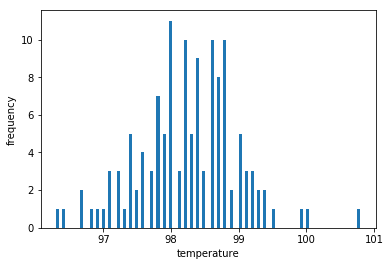

In [29]:
plt.hist(df.temperature,bins=100)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

* verify normality with QQ plot

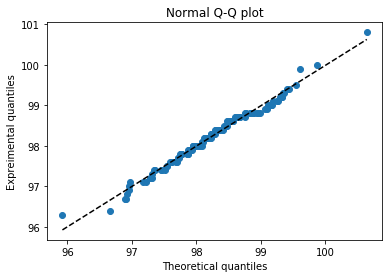

In [36]:

mu=np.mean(df.temperature)
sigma=np.std(df.temperature)
%matplotlib inline
data=df.temperature.values.flatten()
data.sort()
norm=np.random.normal(mu,sigma,len(data))
norm.sort()
#plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--")
plt.title("Normal Q-Q plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Expreimental quantiles")
plt.tick_params()
plt.show()


 ### 2. Is the sample size large? Are the observations independent? 

* yes for independence due to each person's body temperature doesn't affect others
* yes for large sample size (>30)

In [43]:
len(data)>30


True

 ### 3. Is the true population mean really 98.6 degrees F?
   
   
   * First, try a bootstrap hypothesis test.
  

We hypothesize that the true population mean body temperature is 98.6 F. 
Our goal is to calculate the probability of getting a mean temperature less than or equal to what was observed in the data

In [38]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [39]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [45]:
translated_temp=data-mu+98.6
bs_replicates = draw_bs_reps(translated_temp,np.mean,10000)
p=np.sum(bs_replicates<=mu)/len(bs_replicates)
print('p=',p)

p= 0.0


The probability of getting a mean temperature less than or equal to the observed data is almost 0, rejecting the null hypothesis that the body temperature is 98.6F

 * Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
  

one sample test because we are comparing the sample with population mean, instead of comparing two samples.

   * In this situation, is it appropriate to use the $t$ or $z$ statistic? 
  

 we don't know the population standard deviation, so T score would be prudential. However, as the sample size is large, we can use z score
   

In [58]:
# t-test
print(stats.ttest_1samp(data,98.6))

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)


Since t stats is <-5 and p value is close to 0, we would reject the null hypothesis that population mean is 98.6

   * Now try using the other test. How is the result be different? Why?

In [84]:
# z-test

print(statsmodels.stats.weightstats.ztest(data, x2=None, value=98.6, 
                                          alternative='smaller', usevar='pooled', ddof=1.0))

(-5.454823292364077, 2.451078507056712e-08)


Both z-test and t-test provide similar statistic results, suggesting to reject the null hypothesis. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
* Which one is the correct one to use? 
* What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

In [85]:
sample=random.sample(list(data),10) 


In [86]:
# t-test
print(stats.ttest_1samp(sample,98.6))

Ttest_1sampResult(statistic=-3.3393304186218384, pvalue=0.008669401751052911)


In [87]:
# z-test

print(statsmodels.stats.weightstats.ztest(sample, x2=None, value=98.6, 
                                          alternative='smaller', usevar='pooled', ddof=1.0))

(-3.3393304186218384, 0.0004199030430426538)


The t-test would be the correct one to use because we don't know the population standard deviation, and our sample size is <30. There is slight discrepency in the test statistics and the p-value for the tests. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
 * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
 * Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [112]:
# Bootstrap
bs_replicate = np.random.choice(data, size=len(data))

# Compute the 95% confidence interval: conf_int
conf_int_bs = np.percentile(bs_replicate,[2.5,97.5])
print(conf_int_bs)

[96.745  99.4775]


In [109]:
# frequentist 
conf_int_fr = np.percentile(data,[2.5,97.5])
print(conf_int_fr)


[96.7225 99.4775]


temperatures <=96 F or >= 100 would be considered 'abnormal'

### 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.


In [121]:
males=df.temperature[df.gender=='M'].values.flatten()
females=df.temperature[df.gender=='F'].values.flatten()

In [122]:
print(statsmodels.stats.weightstats.ztest(males, females, value=0, 
                                          alternative='two-sided', usevar='pooled', ddof=1.0))


(-2.2854345381656103, 0.02228736076065755)


We are assuming the null hypothesis that there is no difference between males and females in normal temperature is true. Using 2 sided z-test, given large sample size, we are rejecting the hull hypothesis given 5% significance level.